## The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2022 Semester 2

## Assignment 2

**Student Name:**    `Jiahao Chen`

**Student ID:**     `1118749`

## This iPython notebook is a template which you should use for your Assignment 2 submission. This file should be submitted at the **Assignment 2: Code** link on the LMS.

In addition to this file, you should submit a written report explaining your results at the **Assignment 2: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 1. CNN implementation

In this problem, you will implement a CNN to classify the yoga32 dataset. The following code section will load the dataset from a folder that you specify. You may change the batch sizes and validation percentage if you wish, but otherwise it is recommended that you do not modify this section.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import secrets

data_dir = "yoga32" # SPECIFY YOUR PATH TO THE YOGA32 DATASET
train_batch_size = 32
rand_seed = secrets.randbelow(1_000_000_000) # random seed for train/val split
# note that same seed must be used for both to ensure no overlap in train/val data

# Get training images from 'train' directory
train_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/train',
    validation_split=0.2,
    subset="training",
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=train_batch_size)

# Get validation images from 'train' directory
val_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/train',
    validation_split=0.2,
    subset="validation",
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=train_batch_size)

# Output list of class names
class_names = train_data.class_names
print(class_names)

# Note: To train a model with the dataset loaded above, pass the train and val
# datasets to the fit() function, like so:
# myCNNmodel.fit(train_data, validation_data=val_data, epochs=number_of_epochs)

Found 520 files belonging to 10 classes.
Using 416 files for training.
Found 520 files belonging to 10 classes.
Using 104 files for validation.
['bridge', 'childs', 'downwarddog', 'mountain', 'plank', 'seatedforwardbend', 'tree', 'trianglepose', 'warrior1', 'warrior2']


1.1. Implement the CNN shown in the assignment specification and train it on the provided dataset. Plot the training accuracy and validation accuracy over epochs.

In [2]:
# Plot training and validation accuracy of a model
def plot_model_history(history):
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.title('Training and validating accuracy')
    plt.legend()
    plt.show()

In [3]:
# 1. CNN Implementation
# 1.1 Basic architecture

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

cnn_model1 = keras.Sequential(
    [
        layers.Input((32, 32, 3)),
        
        layers.Conv2D(16, (3, 3), activation='relu'),
        layers.Conv2D(16, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        layers.Conv2D(24, (3, 3), activation='relu'),
        layers.Conv2D(24, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ],
)

cnn_model1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

history1 = cnn_model1.fit(train_data, validation_data=val_data, epochs=60, callbacks=[callback])


Epoch 1/60
13/13 [==============================] - 2s 12ms/step - loss: 16.1980 - accuracy: 0.1010 - val_loss: 5.5556 - val_accuracy: 0.1346
Epoch 2/60
13/13 [==============================] - 0s 6ms/step - loss: 4.1562 - accuracy: 0.1274 - val_loss: 2.9995 - val_accuracy: 0.1442
Epoch 3/60
13/13 [==============================] - 0s 5ms/step - loss: 2.4847 - accuracy: 0.1587 - val_loss: 2.3546 - val_accuracy: 0.1731
Epoch 4/60
13/13 [==============================] - 0s 5ms/step - loss: 2.1787 - accuracy: 0.2236 - val_loss: 2.2805 - val_accuracy: 0.2596
Epoch 5/60
13/13 [==============================] - 0s 4ms/step - loss: 2.0497 - accuracy: 0.2428 - val_loss: 2.2192 - val_accuracy: 0.2115
Epoch 6/60
13/13 [==============================] - 0s 5ms/step - loss: 1.9259 - accuracy: 0.2957 - val_loss: 2.1351 - val_accuracy: 0.3365
Epoch 7/60
13/13 [==============================] - 0s 5ms/step - loss: 1.7651 - accuracy: 0.3606 - val_loss: 2.1411 - val_accuracy: 0.3269
Epoch 8/60
13/13 [

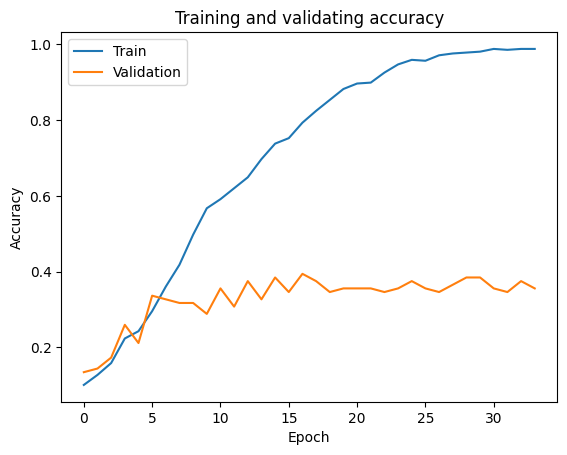

In [4]:
plot_model_history(history1)

1.2. Modify the CNN (see assignment spec for details) and train it on the provided dataset.  Plot the training accuracy and validation accuracy over epochs.

In [5]:
# 1.2 Regularisation and data augmentation
# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomCrop(30, 30),
])


cnn_model2 = keras.Sequential(
    [
        layers.Input((32, 32, 3)),
        data_augmentation,
        
        layers.Conv2D(16, (3, 3), activation='relu'),
        layers.Conv2D(16, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        layers.Conv2D(24, (3, 3), activation='relu', kernel_regularizer='l1'),
        layers.Conv2D(24, (3, 3), activation='relu', kernel_regularizer='l1'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        layers.Flatten(),
        layers.Dropout(rate=0.2),
        layers.Dense(10, activation='softmax')
    ],
)

cnn_model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

history2 = cnn_model2.fit(train_data, validation_data=val_data, epochs=60)

Epoch 1/60
13/13 [==============================] - 1s 21ms/step - loss: 28.5862 - accuracy: 0.0841 - val_loss: 10.3129 - val_accuracy: 0.1346
Epoch 2/60
13/13 [==============================] - 0s 13ms/step - loss: 10.0350 - accuracy: 0.0986 - val_loss: 7.9157 - val_accuracy: 0.1250
Epoch 3/60
13/13 [==============================] - 0s 13ms/step - loss: 7.9746 - accuracy: 0.1611 - val_loss: 7.1916 - val_accuracy: 0.1635
Epoch 4/60
13/13 [==============================] - 0s 13ms/step - loss: 7.3661 - accuracy: 0.1587 - val_loss: 6.9075 - val_accuracy: 0.1731
Epoch 5/60
13/13 [==============================] - 0s 13ms/step - loss: 7.0252 - accuracy: 0.1707 - val_loss: 6.7022 - val_accuracy: 0.2404
Epoch 6/60
13/13 [==============================] - 0s 12ms/step - loss: 6.8352 - accuracy: 0.2284 - val_loss: 6.5674 - val_accuracy: 0.2596
Epoch 7/60
13/13 [==============================] - 0s 12ms/step - loss: 6.6312 - accuracy: 0.2380 - val_loss: 6.4817 - val_accuracy: 0.2788
Epoch 8/60

Epoch 59/60
13/13 [==============================] - 0s 13ms/step - loss: 2.8791 - accuracy: 0.6971 - val_loss: 3.1664 - val_accuracy: 0.5769
Epoch 60/60
13/13 [==============================] - 0s 14ms/step - loss: 2.8605 - accuracy: 0.6947 - val_loss: 3.1258 - val_accuracy: 0.6154


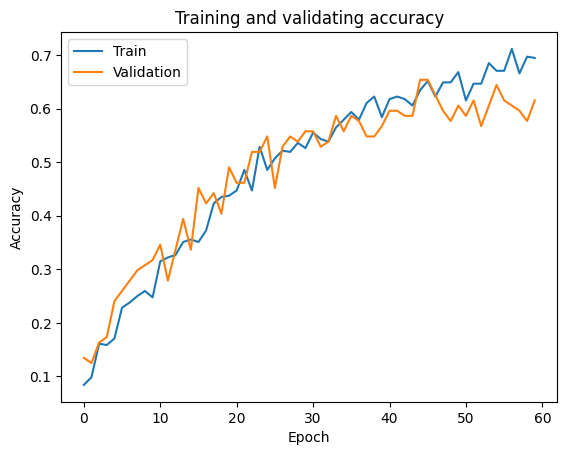

In [6]:
plot_model_history(history2)

### 2. Error anaylsis
Evaluate your CNN model from question 1.2 on the test dataset. See assignment spec for details.

In [7]:
# Get test images from 'test' directory
test_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/test',
    image_size=(32, 32),
    batch_size=7,
    shuffle=False,
)

# Evaluate model performance using the test dataset
def evaluate(model):
    i = 0
    test_loss = 0
    test_acc = 0
    for test_image, test_label in test_data.take(10):
        test_results = model.evaluate(test_image, test_label)
        print(f"Average test results for {class_names[i]} - loss: {test_results[0]} - accuracy: {test_results[1]}%")
        test_loss += test_results[0]
        test_acc += test_results[1]
        i += 1
    print(f"\nOverall - loss: {test_loss / 10} - accuracy: {test_acc / 10}%")

Found 70 files belonging to 10 classes.


In [8]:
evaluate(cnn_model2)

1/1 [==============================] - 0s 36ms/step - loss: 4.0682 - accuracy: 0.4286
Average test results for bridge - loss: 4.068202495574951 - accuracy: 0.4285714328289032%
1/1 [==============================] - 0s 11ms/step - loss: 3.7867 - accuracy: 0.1429
Average test results for childs - loss: 3.7866814136505127 - accuracy: 0.1428571492433548%
1/1 [==============================] - 0s 11ms/step - loss: 3.1701 - accuracy: 0.7143
Average test results for downwarddog - loss: 3.170135974884033 - accuracy: 0.7142857313156128%
1/1 [==============================] - 0s 12ms/step - loss: 2.4781 - accuracy: 0.8571
Average test results for mountain - loss: 2.478079080581665 - accuracy: 0.8571428656578064%
1/1 [==============================] - 0s 11ms/step - loss: 4.5401 - accuracy: 0.2857
Average test results for plank - loss: 4.540097236633301 - accuracy: 0.2857142984867096%
1/1 [==============================] - 0s 10ms/step - loss: 3.1346 - accuracy: 0.7143
Average test results for se

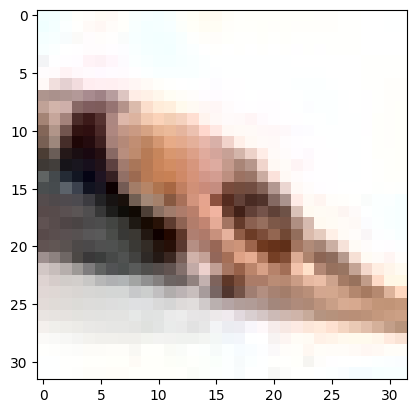

1/1 [==============================] - 0s 10ms/step
Probability for the test sample is childs: 0.3144535422325134
Predicted label is seatedforwardbend with probability of 0.3304597735404968


In [56]:
# Childs
childs_example = image.load_img("yoga32/test/childs/childs317521.jpg", target_size=(32, 32))
plt.imshow(childs_example)
plt.show()

childs_example = np.expand_dims(childs_example, axis=0)
predict_childs = cnn_model2.predict(childs_example)

print(f"Probability for the test sample is childs: {predict_childs[0][1]}")
print(f"Predicted label is {class_names[np.argmax(predict_childs[0])]} with probability of {predict_childs[0][np.argmax(predict_childs[0])]}")

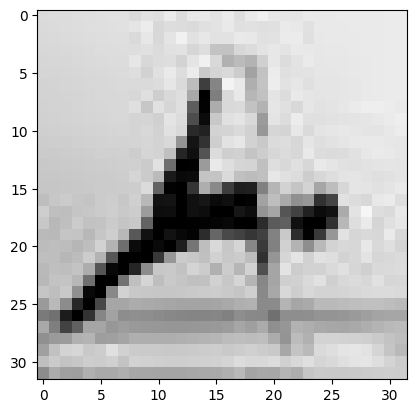

1/1 [==============================] - 0s 10ms/step
Probability for the test sample is plank: 6.100591053836979e-05
Predicted label is warrior2 with probability of 0.6832306385040283


In [57]:
# Plank
plank_example = image.load_img("yoga32/test/plank/plank497903.jpg", target_size=(32, 32))
plt.imshow(plank_example)
plt.show()

plank_example = np.expand_dims(plank_example, axis=0)
predict_plank = cnn_model2.predict(plank_example)

# for index, i in enumerate(predict_plank[0]):
#     print ("probability for the test sample is", index, ":",i)

print(f"Probability for the test sample is plank: {predict_plank[0][4]}")
print(f"Predicted label is {class_names[np.argmax(predict_plank[0])]} with probability of {predict_plank[0][np.argmax(predict_plank[0])]}")

### 3. Visualisation
Visualise the feature space that your model uses to classify images. See assignment spec for details.